<a href="https://colab.research.google.com/github/shinmiura/diveintocode-ml/blob/master/%E4%BF%A1%E7%94%A8%E6%83%85%E5%A0%B1%E3%81%AE%E5%AD%A6%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

テキストの目的

実データに近いものに対して機械学習を行う

どのように学ぶか

Kaggleのデータセットを通じて、機械学習の基本的な流れやライブラリの使い方を学びます。

# 2.信用情報

Kaggleの Home Credit Default Risk コンペティションの学習および推定を行います。


Home Credit Default Risk | Kaggle



【問題1】コンペティション内容の確認

コンペティションのOverviewページ読み、「Home Credit Default Risk」について以下の観点について確認してください。


・何を学習し、何を予測するのか
⇨Home Creditは、電話会社や取引情報などのさまざまな代替データを利用して、クライアントの返済能力を予測する。不十分なまたは存在しない信用履歴のためにローンを取得するのに苦労している人が多くいるため、返済した人と返済遅延した人の過去の信用情報から学習させ、今後貸付しようとする人について回収遅延リスクを予測する。ひいては、利益のマイナスおよびキャッシュ・インフローの喪失を予測しているとも言える。

・どのようなファイルを作りKaggleに提出するか
⇨SK_ID_CURR テストセットのそれぞれについて、TARGET変数の確率を予測する必要がある。

・提出されたものはどういった指標値で評価されるのか
⇨AUCで評価するされる。当該指標値と考えた理由は、kaggleのOverviewに「予測された確率と観察されたターゲットの間のROC曲線の下の領域で評価」と書いてあったため。

# 3.ベースラインモデルの作成

まずは単純な方法による ベースラインモデル　を作成します。精度の基準となるモデルです。


精度を高くする必要はありません。エラーなく実行でき、Kaggle側に推定値を提出できることを目指します。

【問題2】学習と検証

データを簡単に分析、前処理し、学習、検証するまでの一連の流れを作成・実行してください。


検証にはこのコンペティションで使用される評価指標を用いるようにしてください。学習に用いる手法は指定しません。

In [1]:
#必要なライブラリの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
# データの読み込み
dataset = pd.read_csv("/content/drive/MyDrive/DIC/application_train.csv")

In [3]:
# .head()で先頭５行の要素を確認
dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# shapeを用いることでデータの行数や列数を確認
dataset.shape

(307511, 122)

In [5]:
# 要約統計量を出力
dataset.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,...,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,...,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,...,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,

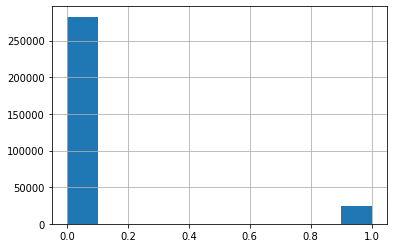

In [6]:
# 分布の確認
dataset['TARGET'].hist()

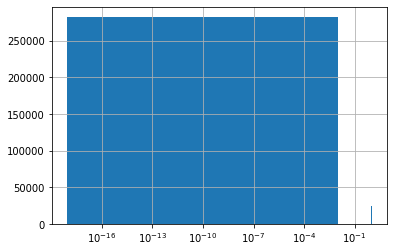

In [7]:
# 対数変換も実施
dataset['TARGET'].hist(bins = 100).set_xscale('log')

In [8]:
#  欠損値の有無を見る
col_names = dataset.columns
for col_name in col_names:
  missing_num = sum(pd.isnull(dataset[col_name]))
  print("{}の欠損値の数:{}個".format(col_name, missing_num))

SK_ID_CURRの欠損値の数:0個
TARGETの欠損値の数:0個
NAME_CONTRACT_TYPEの欠損値の数:0個
CODE_GENDERの欠損値の数:0個
FLAG_OWN_CARの欠損値の数:0個
FLAG_OWN_REALTYの欠損値の数:0個
CNT_CHILDRENの欠損値の数:0個
AMT_INCOME_TOTALの欠損値の数:0個
AMT_CREDITの欠損値の数:0個
AMT_ANNUITYの欠損値の数:12個
AMT_GOODS_PRICEの欠損値の数:278個
NAME_TYPE_SUITEの欠損値の数:1292個
NAME_INCOME_TYPEの欠損値の数:0個
NAME_EDUCATION_TYPEの欠損値の数:0個
NAME_FAMILY_STATUSの欠損値の数:0個
NAME_HOUSING_TYPEの欠損値の数:0個
REGION_POPULATION_RELATIVEの欠損値の数:0個
DAYS_BIRTHの欠損値の数:0個
DAYS_EMPLOYEDの欠損値の数:0個
DAYS_REGISTRATIONの欠損値の数:0個
DAYS_ID_PUBLISHの欠損値の数:0個
OWN_CAR_AGEの欠損値の数:202929個
FLAG_MOBILの欠損値の数:0個
FLAG_EMP_PHONEの欠損値の数:0個
FLAG_WORK_PHONEの欠損値の数:0個
FLAG_CONT_MOBILEの欠損値の数:0個
FLAG_PHONEの欠損値の数:0個
FLAG_EMAILの欠損値の数:0個
OCCUPATION_TYPEの欠損値の数:96391個
CNT_FAM_MEMBERSの欠損値の数:2個
REGION_RATING_CLIENTの欠損値の数:0個
REGION_RATING_CLIENT_W_CITYの欠損値の数:0個
WEEKDAY_APPR_PROCESS_STARTの欠損値の数:0個
HOUR_APPR_PROCESS_STARTの欠損値の数:0個
REG_REGION_NOT_LIVE_REGIONの欠損値の数:0個
REG_REGION_NOT_WORK_REGIONの欠損値の数:0個
LIVE_REGION_NOT_WORK_REGIONの欠損値の数:0個
REG_CITY_NOT_LIVE_CITY

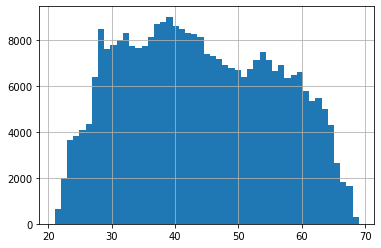

In [9]:
# 外れ値の対応
dataset["age"] = abs(dataset["DAYS_BIRTH"]/365).round().astype(int)
dataset["age"].hist(bins = dataset["age"].nunique())

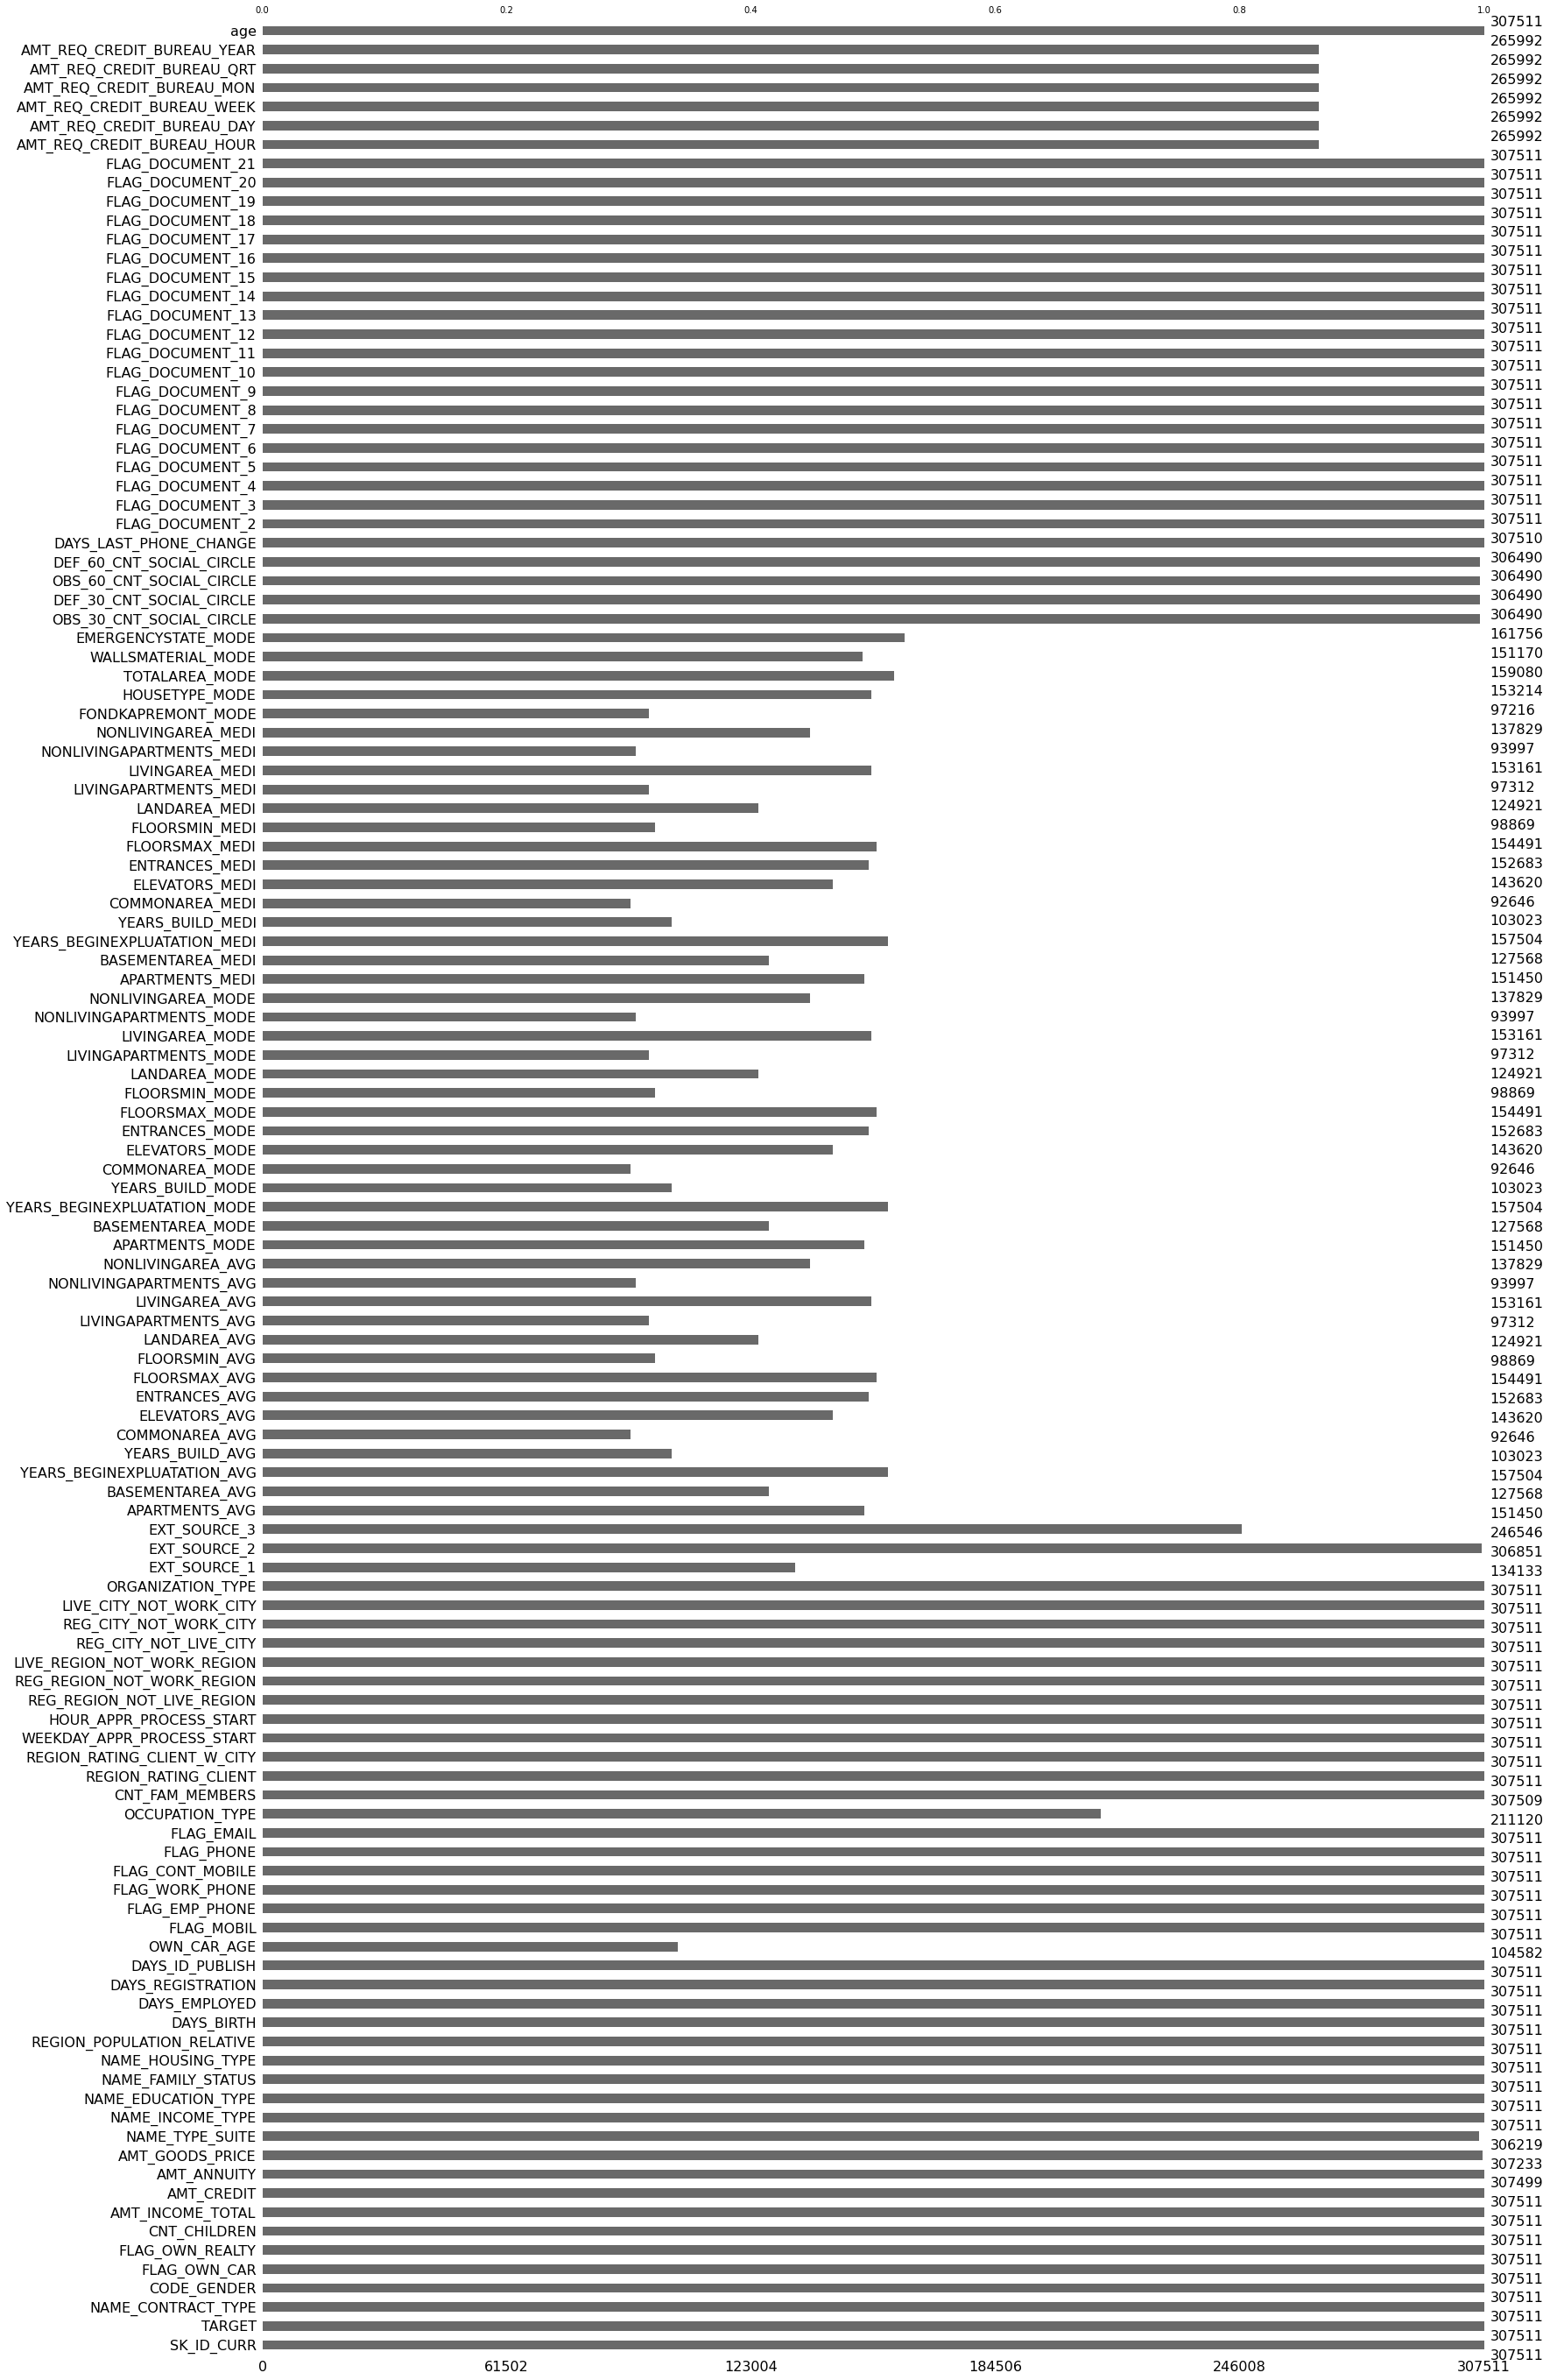

In [10]:
# 各特徴量の欠損値の有無を確認する(テキストに指定されたmissingnoというライブラリでやってみたVer.)。
# まずMissingnoをインストール
import missingno as msno
# 欠損値が何パーセント含まれるかを確認する。
msno.bar(dataset)

In [11]:
# ダミー変数の作成
dataset = pd.get_dummies(dataset)
print(dataset.shape)

(307511, 247)


In [12]:
# カテゴリ変数がなくなった（全ての列がダミー変数化された）ことを確認
dataset.select_dtypes(include=object)

""
0
1
2
3
4
...
307506
307507
307508
307509


In [13]:
# 欠損値の確認(∵上記のとおり欠損値が多過ぎ)
missing_data = pd.DataFrame(dataset.isnull().sum() / len(dataset))
more_missing = missing_data[missing_data.iloc[:, 0] >= 0.5]
more_missing.shape

(38, 1)

In [14]:
# 欠損値のある行と列を削除する
dataset = dataset.dropna(how='any', axis=1)
dataset = dataset.dropna(how='any', axis=0)

In [15]:
print(dataset.shape)

(307511, 186)


In [16]:
# オブジェクトになっている列を確認する
print(dataset.select_dtypes(include=object))

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[307511 rows x 0 columns]


In [17]:
pd.set_option('display.max_rows', 500)

In [18]:
# ターゲット変数と特徴量を定義する
target_col = 'TARGET'
exclude_cols = ['TARGET', 'SK_ID_CURR']
feature_cols = []
for col in dataset.columns:
  if col not in exclude_cols:
    feature_cols.append(col)

In [19]:
feature_cols

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'age',
 'NAME_CONTRACT_TYPE_Cash loans',
 'NAME_CONTRACT_TYPE_

In [20]:
# データ分割用のライブラリ
from sklearn.model_selection import train_test_split

In [21]:
y = dataset[target_col]
X = dataset[feature_cols]

In [22]:
# ndarrayへの変換(∵scikit-learnはNumPyを想定して作られているが、これまでのデータ分析はPandasのDataFrameを使用してきたため)
X = np.array(X)
display(X)

array([[0.0000000e+00, 2.0250000e+05, 4.0659750e+05, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 2.7000000e+05, 1.2935025e+06, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 6.7500000e+04, 1.3500000e+05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 1.5300000e+05, 6.7766400e+05, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.7100000e+05, 3.7010700e+05, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.5750000e+05, 6.7500000e+05, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]])

In [23]:
y = np.array(y)
display(y)

array([1, 0, 0, ..., 0, 1, 0])

In [24]:
# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(215257, 184)
(92254, 184)
(215257,)
(92254,)


In [25]:
dataset.dtypes

SK_ID_CURR                                             int64
TARGET                                                 int64
CNT_CHILDREN                                           int64
AMT_INCOME_TOTAL                                     float64
AMT_CREDIT                                           float64
REGION_POPULATION_RELATIVE                           float64
DAYS_BIRTH                                             int64
DAYS_EMPLOYED                                          int64
DAYS_REGISTRATION                                    float64
DAYS_ID_PUBLISH                                        int64
FLAG_MOBIL                                             int64
FLAG_EMP_PHONE                                         int64
FLAG_WORK_PHONE                                        int64
FLAG_CONT_MOBILE                                       int64
FLAG_PHONE                                             int64
FLAG_EMAIL                                             int64
REGION_RATING_CLIENT    

In [26]:
#  モデルのライブラリを読み込み
from sklearn.ensemble import RandomForestClassifier

In [27]:
# モデルを使って学習　(RandomForest)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_test)[:, 1]
print('ランダムフォレストの推定値：{}'.format(y_pred[:50]))
print('テストラベル：{}'.format(y_test[:50]))

ランダムフォレストの推定値：[0.01 0.05 0.18 0.14 0.05 0.04 0.11 0.13 0.1  0.06 0.08 0.11 0.04 0.15
 0.1  0.03 0.11 0.08 0.07 0.12 0.08 0.23 0.18 0.09 0.08 0.11 0.04 0.05
 0.11 0.06 0.03 0.04 0.06 0.2  0.09 0.02 0.14 0.07 0.09 0.04 0.06 0.06
 0.02 0.05 0.13 0.08 0.04 0.16 0.13 0.15]
テストラベル：[0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0]


In [28]:
X_test_pd = pd.DataFrame(X_test)
X_test_pd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183
0,0.0,121500.0,900000.0,0.018209,-20254.0,365243.0,-5936.0,-3805.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,90000.0,545040.0,0.005084,-17551.0,-9121.0,-8407.0,-1085.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,2.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,112500.0,225000.0,0.007020,-10583.0,-815.0,-10535.0,-1623.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,17.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,45000.0,544491.0,0.018029,-13529.0,-5900.0,-2475.0,-4136.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,3.0,15.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,157500.0,398160.0,0.025164,-13493.0,-5547.0,-7591.0,-4241.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
# ROC、AUC計算と混同行列作成のためのライブラリ読み込み
from sklearn.metrics import roc_curve, auc, confusion_matrix

In [30]:
# 混合行列を作成(閾値を変えられるようにdef関数化した)
def get_conf_matrix(threshold, y_pred, y_test):
  """

  """
  y2_pred = (y_pred > threshold).astype(int)
  labels = [0, 1]
  confusion_m = confusion_matrix(y_test, y2_pred, labels = labels)
  confusionm_df = pd.DataFrame(confusion_m, columns = labels, index = labels)
  confusionm_df.rename(columns = {0 : 'predicted_0', 1 : 'predicted_1'}, index = {0 : 'actual_0', 1 : 'actual_1'}, inplace = True)
  return confusionm_df

In [50]:
# 閾値を8%にして混合行列の呼び出し
get_conf_matrix(0.08, y_pred, y_test)

,predicted_0,predicted_1
actual_0,50029,34787
actual_1,2834,4604


In [32]:
# 閾値を10%にして混合行列の呼び出し
get_conf_matrix(0.10, y_pred, y_test)

,predicted_0,predicted_1
actual_0,60556,24260
actual_1,3795,3643


In [33]:
# 偽陽性率と真陽性率の算出
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [34]:
# AUCの算出
auc = auc(fpr, tpr)

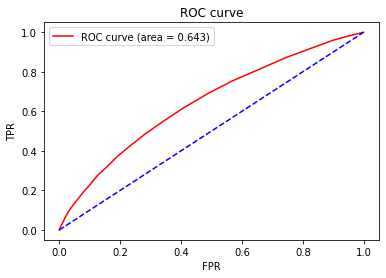

In [35]:
# ROC曲線の描画
plt.plot(fpr, tpr, color = 'red', label = 'ROC curve (area = %.3f)' % auc)
plt.plot([0, 1], [0, 1], color = 'blue', linestyle = '--')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

【問題3】テストデータに対する推定

テストデータ（application_test.csv）に対して推定を行い、Kaggleに提出を行ってください。


正しく提出が行えていれば、精度は低くても構いません。

In [36]:
# テストデータの読み込み
dataset_test = pd.read_csv("/content/drive/MyDrive/DIC/application_test.csv")

In [37]:
dataset_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,...,0.2446,0.3739,0.0388,0.0817,reg oper account,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [39]:
# ダミー変数の作成
dataset_test = pd.get_dummies(dataset_test)
print(dataset_test.shape)

(48744, 242)


In [40]:
# カテゴリ変数がなくなった（全ての列がダミー変数化された）ことを確認
dataset_test.select_dtypes(include=object)

""
0
1
2
3
4
...
48739
48740
48741
48742


In [41]:
# 欠損値のある行と列を削除する
dataset_test = dataset_test.dropna(how='any', axis=1)
dataset_test = dataset_test.dropna(how='any', axis=0)

In [42]:
print(dataset_test.shape)

(48744, 184)


In [43]:
# ndarrayへの変換(∵scikit-learnはNumPyを想定して作られているが、これまでのデータ分析はPandasのDataFrameを使用してきたため)
X_dataset_test = np.array(dataset_test)
display(X_dataset_test)

array([[1.00001e+05, 0.00000e+00, 1.35000e+05, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [1.00005e+05, 0.00000e+00, 9.90000e+04, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.00013e+05, 0.00000e+00, 2.02500e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [4.56223e+05, 1.00000e+00, 2.02500e+05, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [4.56224e+05, 0.00000e+00, 2.25000e+05, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [4.56250e+05, 0.00000e+00, 1.35000e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [44]:
# テストデータに対してRandomForestで推定
rf_pred_submission = rf.predict(X_dataset_test)
print(rf_pred_submission.shape)
print('ランダムフォレストの推定値：{}'.format(rf_pred_submission))

(48744,)
ランダムフォレストの推定値：[0 0 0 ... 0 0 0]


In [45]:
# kaggle提出用にCSVファイル化
rf_pred_submission = pd.DataFrame(rf_pred_submission)
rf_pred_submission = rf_pred_submission.clip(0, 0.99)
rf_pred_submission = rf_pred_submission.rename(columns = {0 : 'TARGET'})
rf_pred_submission = pd.concat([dataset_test['SK_ID_CURR'], rf_pred_submission], axis = 1, join = 'inner')
rf_pred_submission.head()

,SK_ID_CURR,TARGET
0,100001,0.0
1,100005,0.0
2,100013,0.0
3,100028,0.0
4,100038,0.0


In [46]:
# 提出用CSVファイルの出力
rf_pred_submission.to_csv('rf_pred_submission.csv', index = False)

問題３の上記ファイルを提出し、スコアは0.50000だった。

# 4.特徴量エンジニアリング

ベースラインモデルを元に、入力する特徴量にさまざまな工夫を行い精度を向上させていきます。



【問題4】特徴量エンジニアリング

精度を上げるために以下のような観点で 特徴量エンジニアリング（Feature Engineering） を行ってください。

・どの特徴量を使うか

・どう前処理をするか


何をした時に検証データに対する評価指標がどのようになったかをまとめてください。最低5パターンの学習・検証を行ってください。


精度が高かったものに関してはテストデータに対しても推定を行い、Kaggleに提出を行ってください。



〈パターン①〉不均衡なターゲット数を調整するためサンプルを500ずつに合わせる

In [47]:
# target0とtarget1にデータを分割する
tgt0 = dataset.query('TARGET == 0')
tgt1 = dataset.query('TARGET == 1')

# 各500サンプルずつ抽出のうえ、データフレームに変換する
tgt0 = tgt0.sample(n = 500)
tgt1 = tgt1.sample(n = 500)

# 両者を結合して各500ずつ合計1000のデータセットにする
df_1000 = pd.concat([tgt0, tgt1])

y2 = df_1000['TARGET']
X2 = df_1000.drop(['TARGET', 'SK_ID_CURR'], axis = 1)

# ndarrayへの変換(∵scikit-learnはNumPyを想定して作られているが、これまでのデータ分析はPandasのDataFrameを使用してきたため)
npy2 = np.array(y2)
npX2 = np.array(X2)

display(X2.shape)
display(y2.shape)

(1000, 184)

(1000,)

In [48]:
# データの分割
X2_train, X2_test, y2_train, y2_test = train_test_split(npX2, npy2, test_size=0.3, random_state=1234)
#print(X2_train.shape)
#print(X2_test.shape)
#print(y2_train.shape)
#print(y2_test.shape)

In [58]:
# モデルを使って学習　(RandomForest)
rf = RandomForestClassifier()
rf.fit(X2_train, y2_train)
y3_pred = rf.predict_proba(X2_test)[:, 1]
print('ランダムフォレストの推定値：{}'.format(y3_pred[:50]))
print('テストラベル：{}'.format(y2_test[:50]))

ランダムフォレストの推定値：[0.56 0.65 0.41 0.63 0.23 0.6  0.59 0.64 0.54 0.73 0.6  0.51 0.53 0.45
 0.54 0.5  0.48 0.43 0.5  0.68 0.5  0.64 0.77 0.36 0.61 0.53 0.63 0.65
 0.4  0.54 0.48 0.36 0.74 0.57 0.44 0.58 0.54 0.56 0.54 0.77 0.23 0.32
 0.4  0.49 0.72 0.53 0.45 0.37 0.52 0.53]
テストラベル：[1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1
 1 1 1 0 1 0 1 1 1 0 0 1 0]


In [ ]:
X_test_pd = pd.DataFrame(X_test)
X_test_pd.head()

In [72]:
# 偽陽性率と真陽性率の算出
fpr2, tpr2, thresholds = roc_curve(y2_test, y3_pred)

In [73]:
# AUCの算出
auc = auc(fpr2, tpr2)

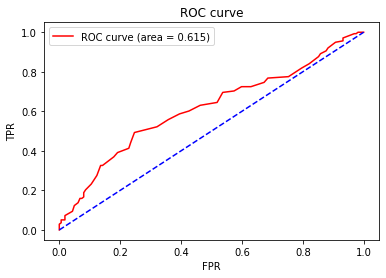

In [74]:
# ROC曲線の描画
plt.plot(fpr2, tpr2, color = 'red', label = 'ROC curve (area = %.3f)' % auc)
plt.plot([0, 1], [0, 1], color = 'blue', linestyle = '--')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

〈パターン②〉　標準化

In [64]:
# 標準化をするライブラリの読み込み
from sklearn.preprocessing import StandardScaler

In [65]:
# インポートしたモデルのインスタンス化
scaler = StandardScaler()

In [66]:
# 訓練用データの標準化
X_train_std = scaler.fit_transform(X_train)

In [67]:
# 検証用データの標準化
X_test_std = scaler.fit_transform(X_test)
X_test_std

array([[-0.58099972, -0.42738611,  0.73997435, ..., -0.13386191,
        -1.04252773, -0.08794212],
       [ 0.81340566, -0.71409851, -0.13887431, ..., -0.13386191,
         0.9592071 , -0.08794212],
       [-0.58099972, -0.50930394, -0.93126423, ..., -0.13386191,
        -1.04252773, -0.08794212],
       ...,
       [ 3.60221642, -0.91889308, -0.93126423, ..., -0.13386191,
         0.9592071 , -0.08794212],
       [-0.58099972,  0.92425807,  1.70149361, ..., -0.13386191,
         0.9592071 , -0.08794212],
       [-0.58099972,  0.30987435,  1.68700954, ..., -0.13386191,
         0.9592071 , -0.08794212]])

In [68]:
# モデルを使って学習　(RandomForest)
rf = RandomForestClassifier()
rf.fit(X_train_std, y_train)
y4_pred = rf.predict_proba(X_test_std)[:, 1]
print('ランダムフォレストの推定値：{}'.format(y4_pred[:50]))
print('テストラベル：{}'.format(y_test[:50]))

ランダムフォレストの推定値：[0.01 0.05 0.19 0.22 0.06 0.1  0.09 0.08 0.11 0.15 0.09 0.08 0.03 0.17
 0.06 0.06 0.08 0.11 0.03 0.16 0.11 0.16 0.25 0.14 0.11 0.21 0.03 0.12
 0.2  0.09 0.07 0.08 0.1  0.16 0.08 0.12 0.1  0.17 0.15 0.09 0.06 0.06
 0.07 0.08 0.17 0.13 0.05 0.19 0.17 0.1 ]
テストラベル：[0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0]


In [79]:
# 偽陽性率と真陽性率の算出
fpr3, tpr3, thresholds = roc_curve(y_test, y4_pred)

In [80]:
# AUCの算出
auc = auc(fpr3, tpr3)

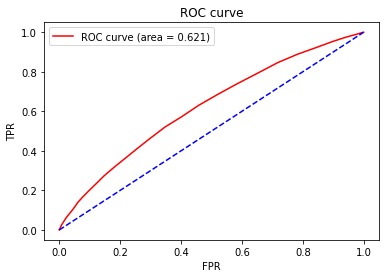

In [81]:
# ROC曲線の描画
plt.plot(fpr3, tpr3, color = 'red', label = 'ROC curve (area = %.3f)' % auc)
plt.plot([0, 1], [0, 1], color = 'blue', linestyle = '--')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()